## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

In [176]:
# Instalar biblioteca
#%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [178]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [179]:
df['income'] = df['income'].str.replace('.', '', regex=False)
df['workclass'] = df['workclass'].replace('?', 'Unknown')
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Unknown,1836
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [180]:
# Verificar valores faltantes en cada columna
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [181]:
df.dropna(inplace=True)

print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


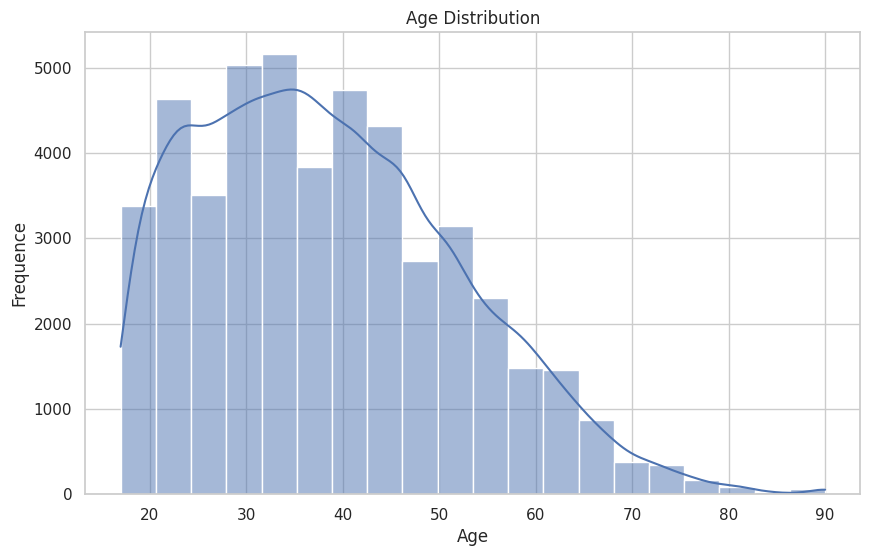

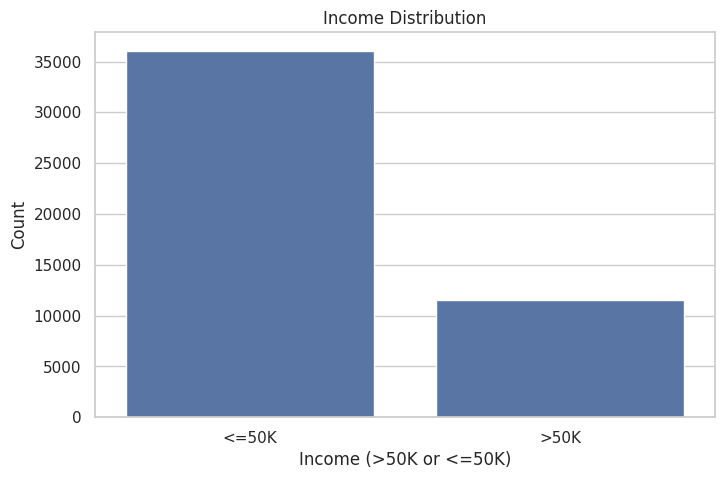

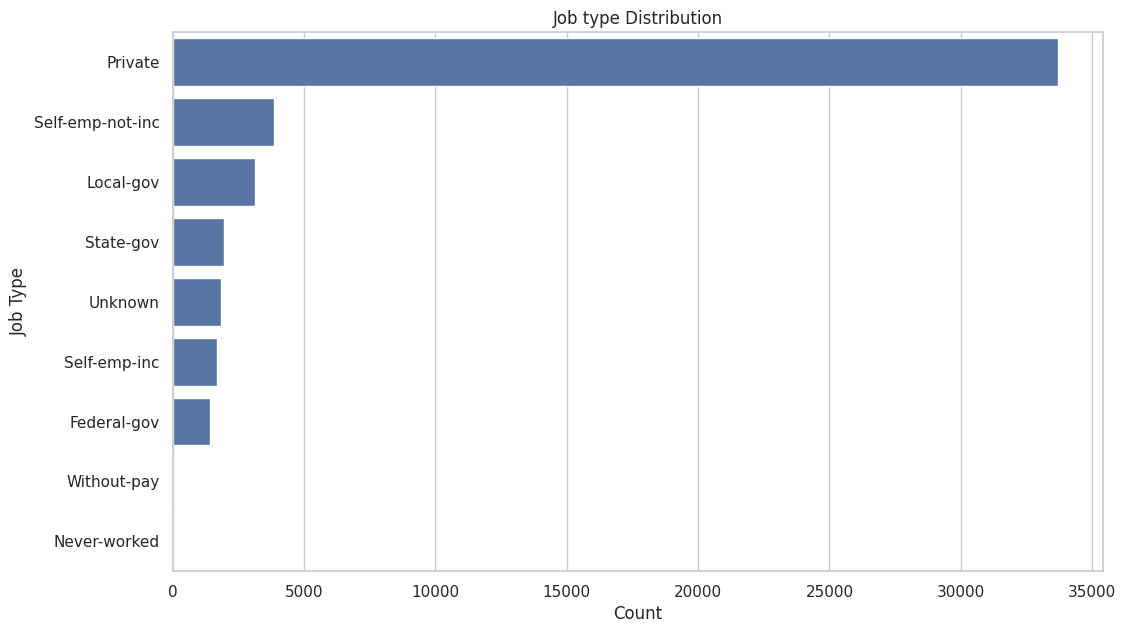

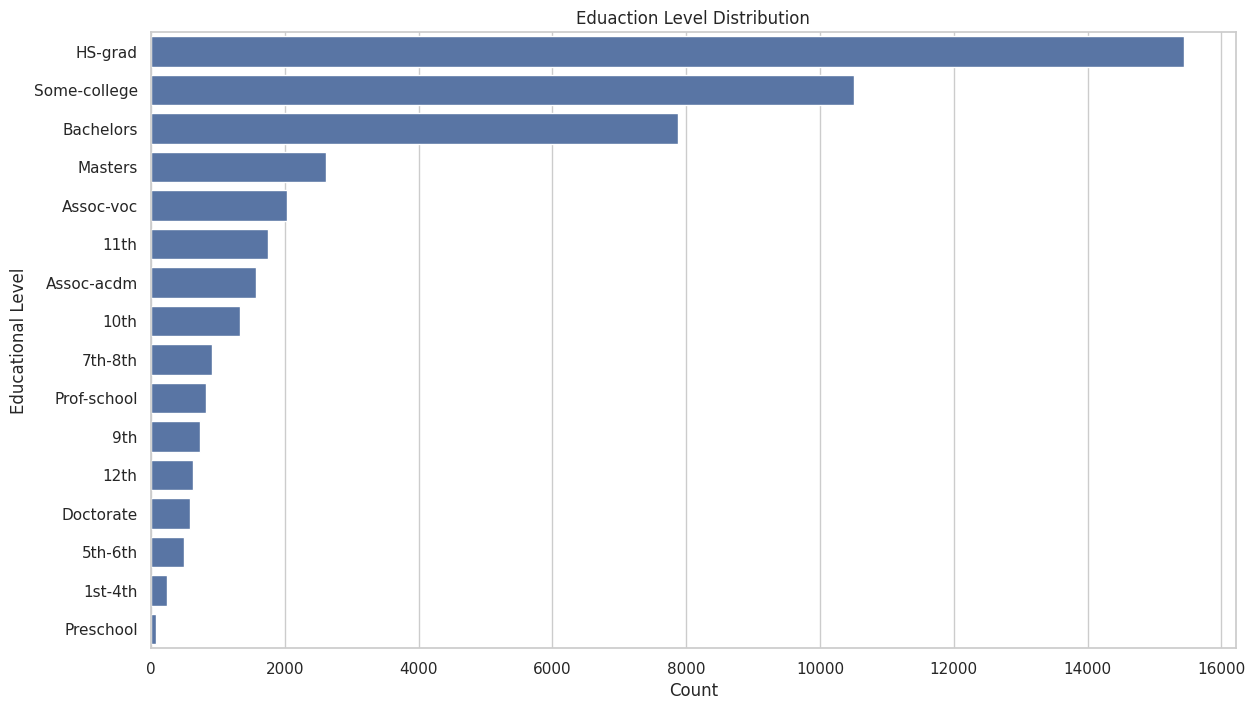

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para la variable 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

# Gráfico de barras para la variable 'income' (variable target)
plt.figure(figsize=(8, 5))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.xlabel('Income (>50K or <=50K)')
plt.ylabel('Count')
plt.show()

# Gráfico de barras para la variable 'workclass'
plt.figure(figsize=(12, 7))
sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index)
plt.title('Job type Distribution')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

# Gráfico de barras para la variable 'education'
plt.figure(figsize=(14, 8))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Eduaction Level Distribution')
plt.xlabel('Count')
plt.ylabel('Educational Level')
plt.show()

*   Vemos una concentracion entorno a los 25 a 40 años son los más estudiados o los que mas se encuentran en la muestra
*   Vemos que la mayoria de los datos apuntan  a ganancias igual o menores a los 50K
*   Admeas esto se ve como mas del 70% de los estudiados tienen un trabajo de tipo privado y gran parte son graduados de secundaria, seguidos por "College" y luego "Bachelors"


#@Title Analisis Bivariado del data set


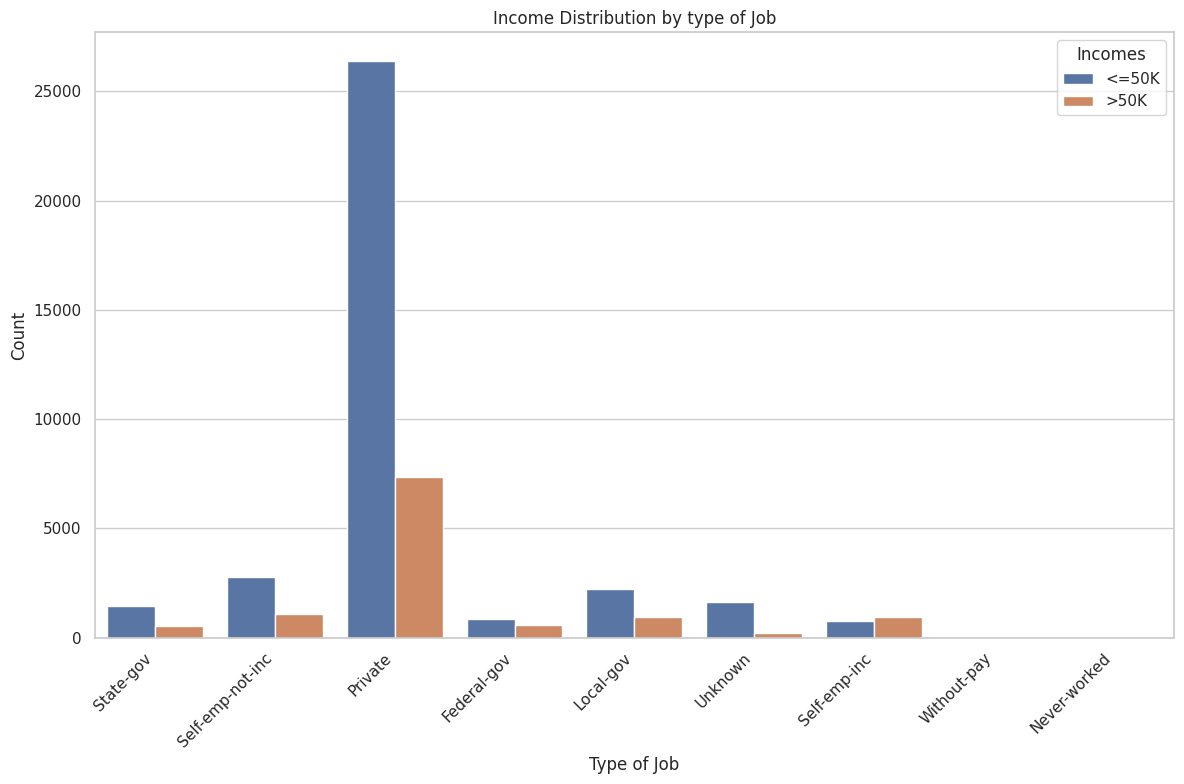

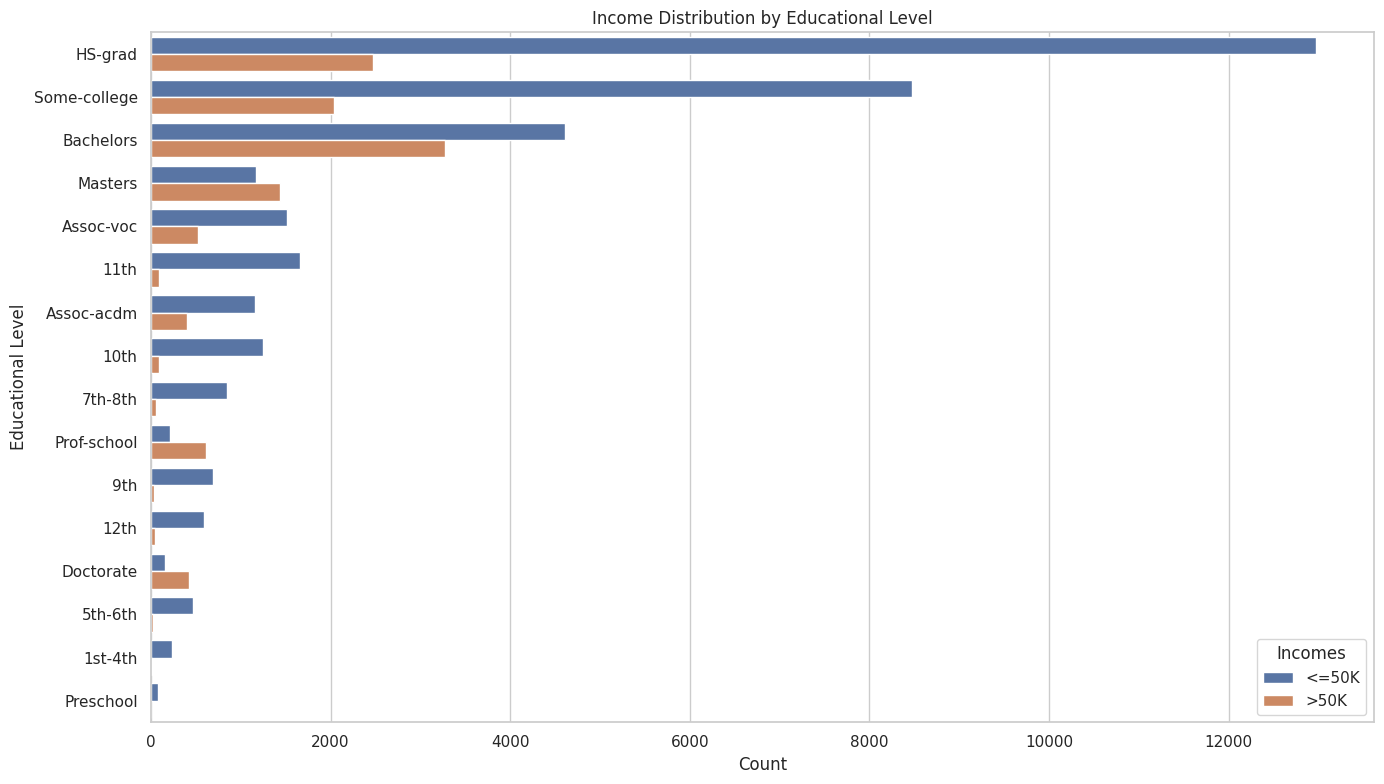

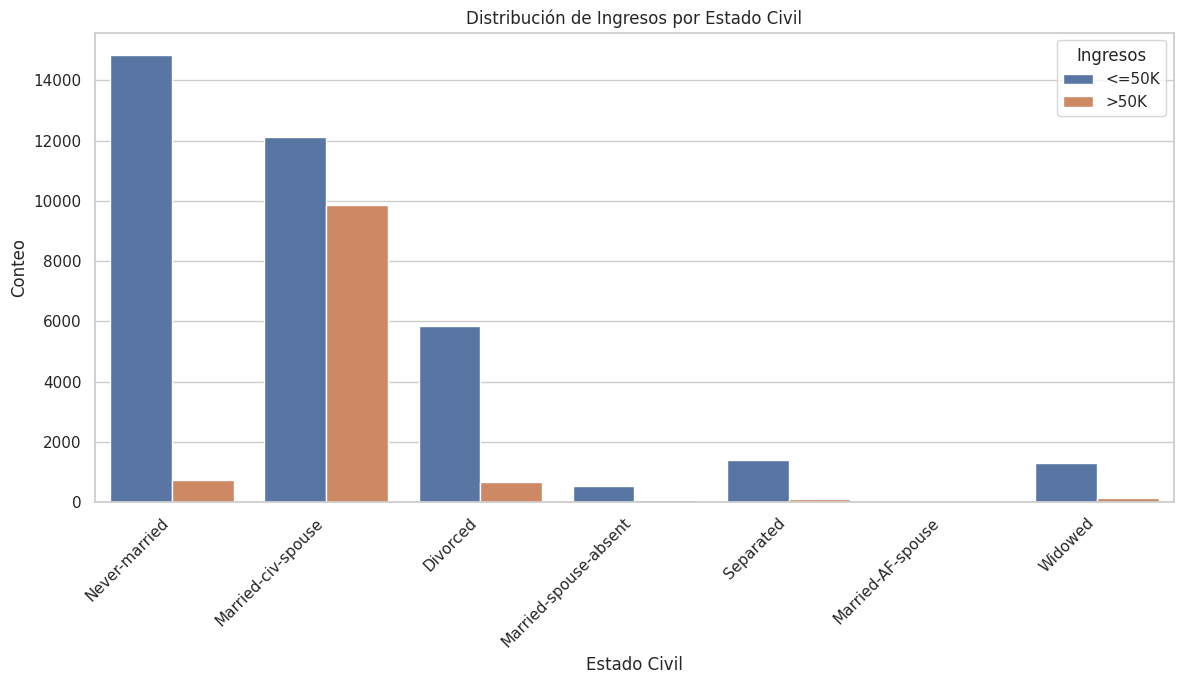

In [183]:
# Gráfico de barras apiladas para 'workclass' y 'income'
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='workclass', hue='income')
plt.title('Income Distribution by type of Job')
plt.xlabel('Type of Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Incomes')
plt.tight_layout()
plt.show()

# Gráfico de barras apiladas para 'education' y 'income'
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='education', hue='income', order=df['education'].value_counts().index)
plt.title('Income Distribution by Educational Level')
plt.xlabel('Count')
plt.ylabel('Educational Level')
plt.legend(title='Incomes')
plt.tight_layout()
plt.show()

# Gráfico de barras apiladas para 'marital-status' y 'income'
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='marital-status', hue='income')
plt.title('Distribución de Ingresos por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ingresos')
plt.tight_layout()
plt.show()


*   Vemos una distribucion mayor en donde a medida que aumenta el grado vemos un aumento en los salarios, en grados más bajos predominian los slaarios bajo 50K y en posgrados toma mayor peso y tienen mejores salarios

#@Title Analisis Matriz de Covarianza del DataSet

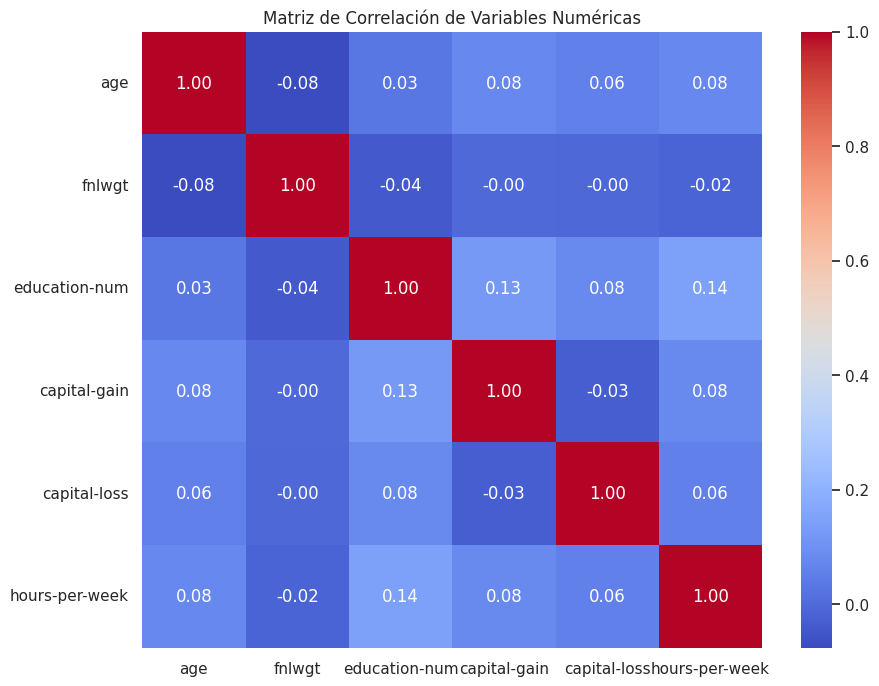

In [184]:
# Calcular la matriz de correlación para variables numéricas
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


*   Vemos que capital gain aumenta a medida que aumenta tambien el grado educacional, esto puede entenderese como a medida que avanzo en mi carrera academica se me percibe como con mayor entendimiento de la materia y más preparado para afrontar problemas, por lo que, mis pagos son mayores

##@Title Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**

In [185]:
#Intalación
!pip install lazypredict

In [186]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [187]:
Y = df['income']

In [188]:
X = df.drop(columns = 'income')

In [189]:
df.shape

(47621, 15)

In [190]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [191]:
df_10 = df.sample(frac=0.1, random_state=2023)  # frac=0.1 selecciona el 10%

In [192]:
df_10

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45705,32,Self-emp-inc,169152,Assoc-voc,11,Divorced,Exec-managerial,Not-in-family,White,Female,10520,0,80,Greece,>50K
15311,41,Private,267252,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,1902,40,United-States,>50K
14326,48,Private,247895,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,>50K
45716,34,Private,195748,Assoc-acdm,12,Never-married,Adm-clerical,Own-child,Black,Female,0,0,38,United-States,<=50K
2363,28,Private,42734,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21371,30,Private,207668,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,60,Hungary,<=50K
7301,66,Unknown,376028,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,20,United-States,<=50K
46098,31,Private,103772,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
22321,47,Private,199832,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [193]:
# Codificar variables categóricas
for col in df_10.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_10[col] = le.fit_transform(df_10[col])

# Definir X (features) e y (target)
X = df_10.drop('income', axis=1)  # Suponiendo que 'income' es la columna objetivo
y = df_10['income']  # 1 si >50K, 0 si <=50K

# División en conjunto de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42, stratify=y
)


In [ ]:
# Inicializar LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrenar y evaluar
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


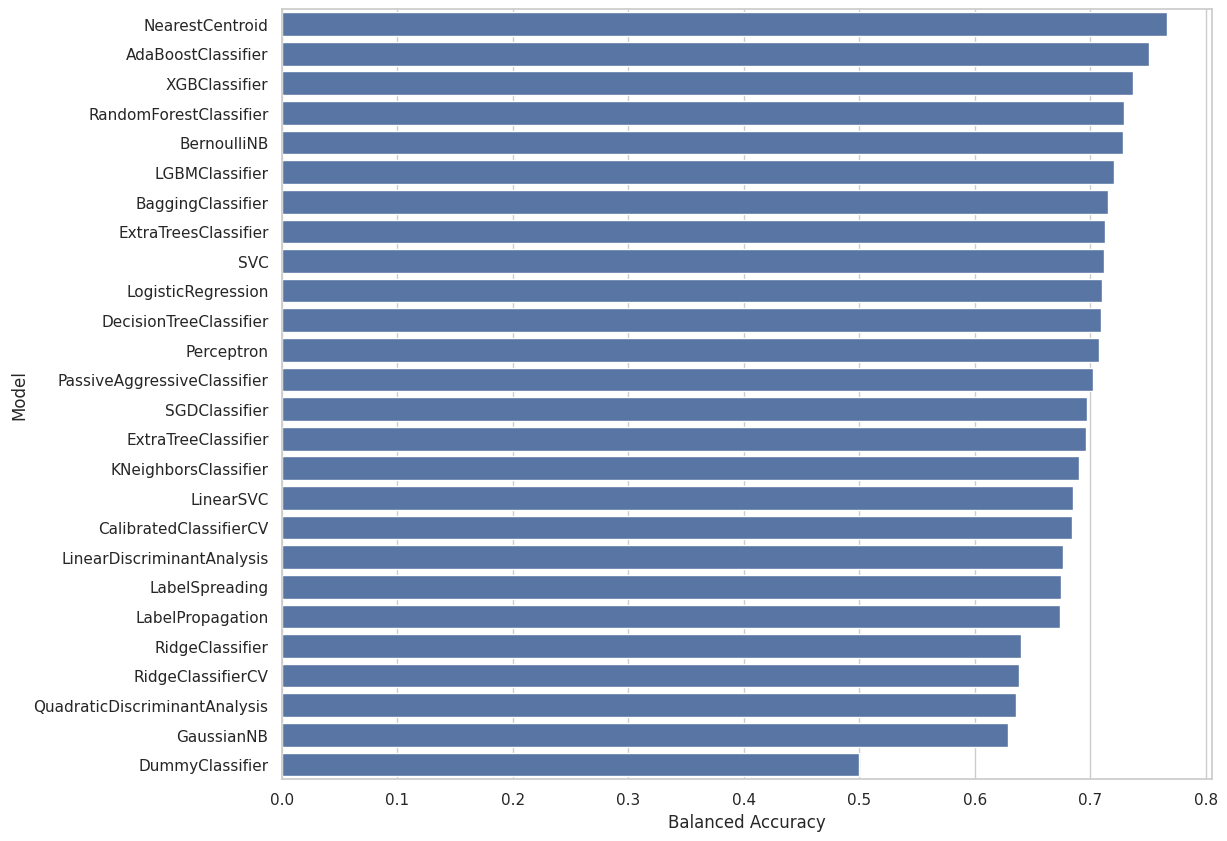

In [195]:
#Visualizando el mejor modelo
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Balanced Accuracy", data=predictions)